<a href="https://colab.research.google.com/github/luongdo94/Data-Sciences/blob/main/Online_Dating_Behavior_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Online_Dating_Behavior_Dataset.csv")

In [3]:
df.head(3)

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   PurchasedVIP    1000 non-null   int64
 2   Income          1000 non-null   int64
 3   Children        1000 non-null   int64
 4   Age             1000 non-null   int64
 5   Attractiveness  1000 non-null   int64
 6   Matches         1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [5]:
df.isnull().sum()

Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64

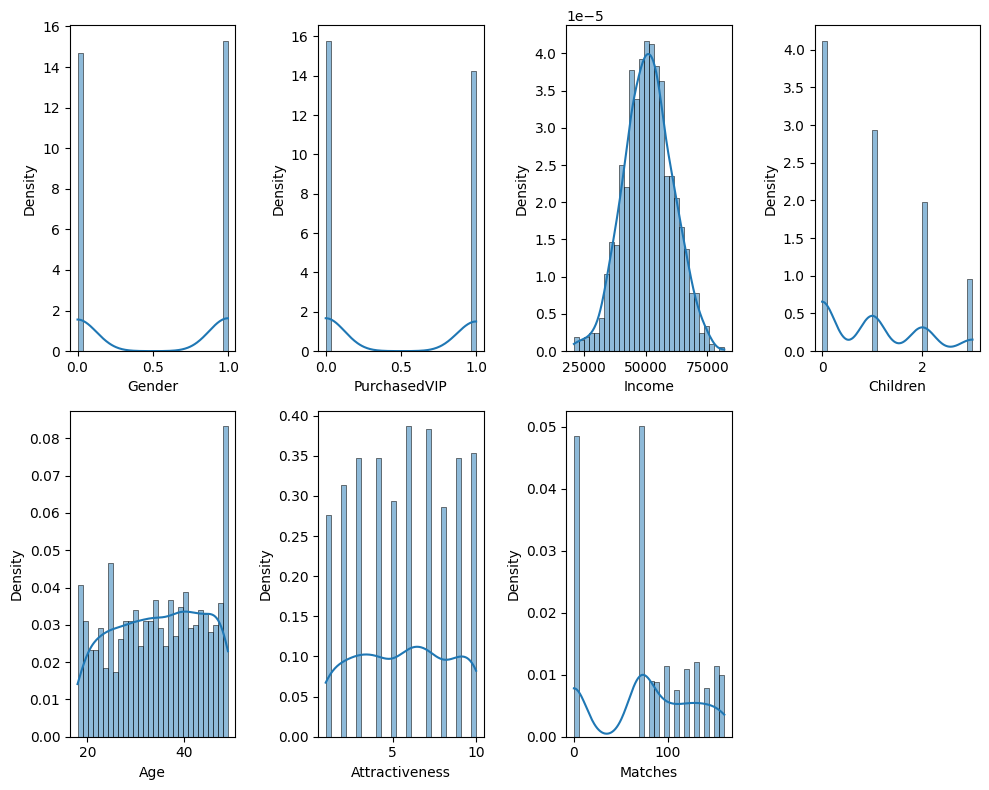

In [13]:
num_cols_eda = df.columns

fig, ax = plt.subplots(2, 4, figsize=(10, 8))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    sns.histplot(df[col],kde=True,stat='density',bins=30,ax=ax[i])

for i in range(len(num_cols_eda),8):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

Encode independent variables

In [62]:
features=['Income', 'Age', 'Attractiveness', 'Children']
X=df[features]
y=df["Matches"]

In [19]:
X

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
0,0,1,51777,3,47,5
1,1,0,36646,0,42,7
2,0,0,53801,1,25,5
3,0,0,56105,0,35,8
4,0,0,55597,1,36,6
...,...,...,...,...,...,...
995,0,0,36799,0,28,1
996,0,1,43882,2,46,9
997,1,0,49629,2,49,6
998,1,0,45706,1,22,8


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2024)
X_test.shape, X_train.shape

((200, 6), (800, 6))

standardize the features


In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[features] = sc.fit_transform(X_train[features])
X_test[features] = sc.fit_transform(X_test[features])


In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  classification_report, accuracy_score
dt_model= DecisionTreeRegressor(random_state=2024)
dt_model.fit(X_train, y_train)
y_pred_dt=dt_model.predict(X_test)
acc_dt=accuracy_score(y_test, y_pred_dt)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
          70       1.00      1.00      1.00        49
          80       1.00      1.00      1.00         5
          90       1.00      1.00      1.00        17
         100       1.00      1.00      1.00        10
         110       1.00      1.00      1.00        10
         120       1.00      1.00      1.00        17
         130       1.00      1.00      1.00        10
         140       1.00      1.00      1.00        12
         150       0.00      0.00      0.00         8
         160       0.56      1.00      0.71        10

    accuracy                           0.96       200
   macro avg       0.87      0.91      0.88       200
weighted avg       0.94      0.96      0.95       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000, solver="liblinear")
log_reg.fit(X_train, y_train)
y_pred_lr=log_reg.predict(X_test)
acc_lr=accuracy_score(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
          70       0.65      0.84      0.73        49
          80       0.25      0.80      0.38         5
          90       0.00      0.00      0.00        17
         100       0.22      0.40      0.29        10
         110       0.00      0.00      0.00        10
         120       0.33      0.06      0.10        17
         130       0.28      0.50      0.36        10
         140       0.00      0.00      0.00        12
         150       0.25      0.50      0.33         8
         160       0.71      1.00      0.83        10

    accuracy                           0.60       200
   macro avg       0.34      0.46      0.37       200
weighted avg       0.52      0.60      0.54       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
